# Central Limit Theorem (CLT) Demonstration

The **Central Limit Theorem** (CLT) states:

> *Given a sequence of independent and identically distributed (i.i.d.) random variables with finite mean $\mu$ and variance $\sigma^2$, the distribution of their sample average approaches a normal distribution with mean $\mu$ and variance $\sigma^2/n$ as the sample size $n$ becomes large.*

This notebook illustrates the CLT by:
- Drawing i.i.d. samples from a selected distribution
- Computing sample means
- Showing how the distribution of sample means tends toward a normal distribution

In [2]:
from ipywidgets import interactive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm # chi2, norm, expon, uniform
import warnings
warnings.filterwarnings('ignore')

# Settings for plots
sns.set(style="whitegrid")

plt.ion()
%matplotlib widget

## Simulate and Visualize the CLT

interactive(children=(Dropdown(description='dist', options=('normal', 'exponential', 'chi2', 'uniform'), value…

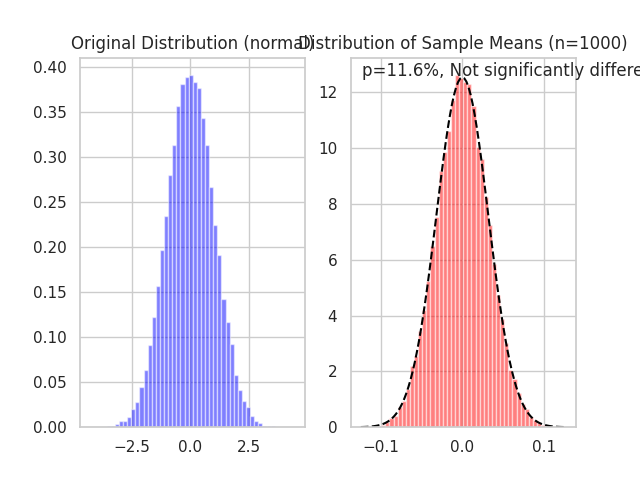

In [5]:
fig, ax = plt.subplots(ncols=2)

dist_params={}

def update(dist: str, num_samples: int):
    n = 1000
    if dist == 'normal':
        mu, sigma = dist_params.get('mu', 0), dist_params.get('sigma', 1)
        data = np.random.normal(mu, sigma, (num_samples, n))
    elif dist == 'exponential':
        scale = dist_params.get('scale', 1)
        data = np.random.exponential(scale, (num_samples, n))
    elif dist == 'chi2':
        df = dist_params.get('df', 3)
        data = np.random.chisquare(df, (num_samples, n))
    elif dist == 'uniform':
        low, high = dist_params.get('low', 0), dist_params.get('high', 1)
        data = np.random.uniform(low, high, (num_samples, n))
    else:
        raise ValueError("Unsupported distribution")

    sample_means = data.mean(axis=1)



    ax[0].clear()
    ax[1].clear()
    # Plot original distribution of 1 sample
    ax[0].hist(data[:, 0], alpha=0.5, density=True, bins=50, color='blue')
    ax[0].set_title(f"Original Distribution ({dist})")

    # Plot distribution of sample means
    ax[1].hist(sample_means, alpha=0.5, density=True, bins=50, color='red')
    ax[1].set_title(f"Distribution of Sample Means (n={n})")

    xs = np.linspace(sample_means.min(), sample_means.max(), 100)
    ax[1].plot(xs, norm.pdf(xs, sample_means.mean(), sample_means.std()), "--", color="black")

    shapiro_result = stats.shapiro(sample_means)
    sig = shapiro_result.pvalue < 0.05
    sig_text = "Significantly different" if sig else "Not significantly different"
    ax[1].text(0.05, 0.95, f"p={shapiro_result.pvalue*100:3.1f}%, {sig_text}", transform=ax[1].transAxes)

    # fig.tight_layout()
    fig.show()

interactive(update, dist=["normal", "exponential", "chi2", "uniform"], num_samples=(1, 100000, 10))